In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
diabetes_dataset = pd.read_csv('/content/sample_data/diabetes.csv')

In [ ]:
# Basic info about the dataset
print(diabetes_dataset.head())
print(diabetes_dataset.shape)
print(diabetes_dataset.describe())
print(diabetes_dataset['Outcome'].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


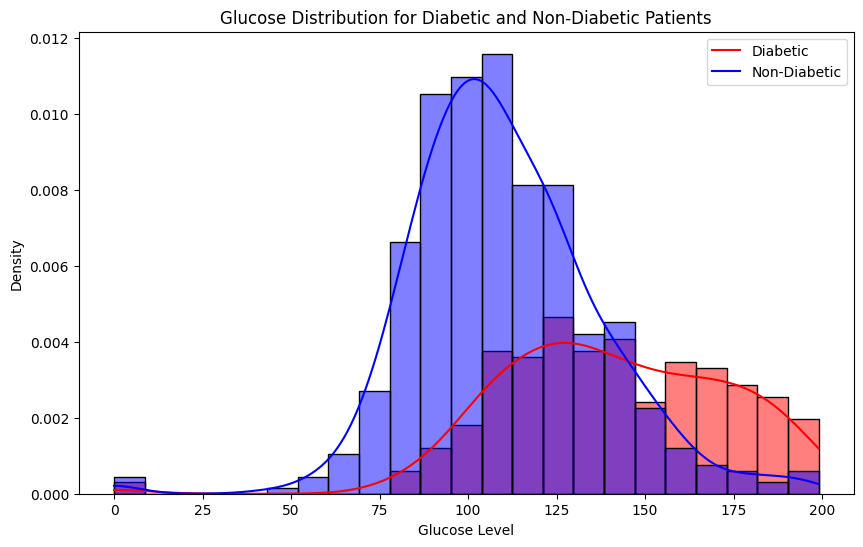

In [ ]:
# Data Visualization --> Distribution of glucose levels
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetes_dataset, x='Glucose', hue='Outcome', kde=True, stat="density", palette={1: 'red', 0: 'blue'})
plt.title("Glucose Distribution for Diabetic and Non-Diabetic Patients")
plt.xlabel("Glucose Level")
plt.ylabel("Density")
plt.legend(['Diabetic', 'Non-Diabetic'])
plt.show()

In [ ]:
# Prepare features and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
# Scale the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Define and evaluate multiple models
models = {
    "SVM": svm.SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    test_acc = model.score(X_test, Y_test)
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

SVM - Train Accuracy: 0.7866, Test Accuracy: 0.7727
Logistic Regression - Train Accuracy: 0.7850, Test Accuracy: 0.7597
Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.6818
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7403


In [ ]:
# Choose classifier (SVM)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Input data
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)

input_df = pd.DataFrame([input_data], columns=diabetes_dataset.drop(columns='Outcome').columns)

In [ ]:
# Standardize input using the same scaler
std_input = scaler.transform(input_df)

In [ ]:
# Predict
prediction = classifier.predict(std_input)
print("Prediction Result:", prediction)

Prediction Result: [0]


In [ ]:
if prediction[0] == 0:
    print("This person is not diabetic.")
else:
    print("This person is diabetic. Doctor check-ups are recommended.")

This person is not diabetic.
